# Exploratory Data Analysis (EDA) of Financial News Headlines

This notebook performs exploratory data analysis on the financial news dataset. 
We will load the dataset, analyze descriptive statistics, and visualize data trends.

In [2]:
import pandas as pd

# Load the analyst ratings dataset
try:
    df = pd.read_csv('data/raw_analyst_ratings.csv')  
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'raw_analyst_ratings.csv' was not found.")
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Dataset loaded successfully.


## Descriptive Statistics

We will calculate basic statistics of the dataset, including:
- Summary statistics
- Headline lengths
- Article counts per publisher
- Trends over time based on publication dates

In [3]:
try:
    print(df.describe())
    print(df['headline'].str.len().describe())  # Analyze headline lengths
    print(df['publisher'].value_counts())        # Count articles per publisher
    df['date'] = pd.to_datetime(df['date'])
    print(df['date'].dt.date.value_counts())     # Trends over time
except Exception as e:
    print(f"An error occurred while calculating statistics: {e}")

         Unnamed: 0
count  1.407328e+06
mean   7.072454e+05
std    4.081009e+05
min    0.000000e+00
25%    3.538128e+05
50%    7.072395e+05
75%    1.060710e+06
max    1.413848e+06
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline, dtype: float64
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64
An error occurred while calculating statistics: time data "2020-05-22 00:00:00" doesn't match format "%Y-%m-%d %H:%M:%S%z", at position 10. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8

## Text Analysis (Topic Modeling)

We will use Natural Language Processing (NLP) to identify keywords in the headlines.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

try:
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(df['headline'])
    print("Keywords identified:")
    print(vectorizer.get_feature_names_out())
except Exception as e:
    print(f"An error occurred during text analysis: {e}")

Keywords identified:
['00' '000' '0000' ... 'β⁰' 'γ8' '元36']


## Time Series Analysis

We will analyze the frequency of article publications over time.

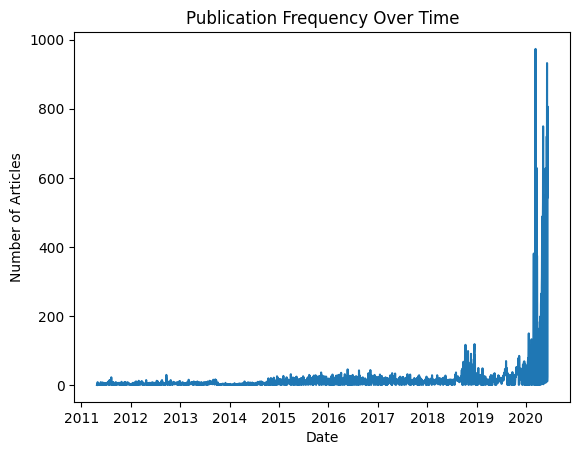

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and contains a 'date' column

try:
    # Convert the 'date' column to datetime format, coercing errors
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    
    # Check for any NaT values that indicate issues with the conversion
    if df['date'].isnull().any():
        print("Warning: Some date entries could not be converted.")

    # Now you can use the .dt accessor
    df['date'].dt.date.value_counts().sort_index().plot()
    plt.title('Publication Frequency Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Articles')
    plt.show()
except Exception as e:
    print(f"An error occurred while plotting time series data: {e}")

## Publisher Analysis

This section examines the contributions of various publishers to the dataset.

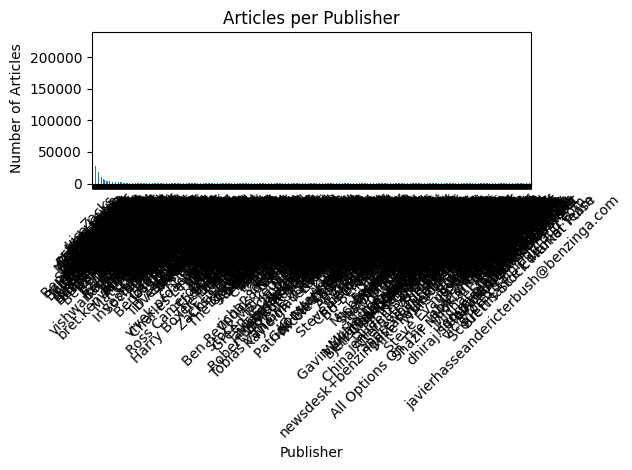

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and contains a 'publisher' column

try:
    # Count articles per publisher and plot
    df['publisher'].value_counts().plot(kind='bar')
    plt.title('Articles per Publisher')
    plt.xlabel('Publisher')
    plt.ylabel('Number of Articles')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.tight_layout()        # Adjust layout to prevent clipping
    plt.show()
except Exception as e:
    print(f"An error occurred while plotting publisher data: {e}")

## Conclusion

This notebook has successfully carried out exploratory data analysis on the financial news dataset. 
I have calculated descriptive statistics, performed text analysis, and visualized trends.